# Used Car Prize DataSet Cleaning and Analysis

In this notebook we are going to clean a dataset which contain more than 350k records. Also we are going to perform some analysis on 'How and which features of automobile influence in prize'. 

In [1]:
#importing pandas package as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


## Reading Dataset

In [2]:
path = "C:\\Users\\VC HARSHAD ROSHAN\\Desktop\\python\\mini project\\train-data.csv"
#Setting dataset location

df = pd.read_csv(path,header=0,sep=',',encoding='Latin1')

## Type of Data

Let's see which types of data our dataset contains

In [3]:
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

Above line of code will give us what are the column our dataset contains and what is the data type of the column

## Statistical summary of Dataset

In [4]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
df.head(5)
#Displaying first 5 rows

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## No of unique car details

In [6]:
a = df.Name.unique()
print("The dataset contians " + str(len(a)) + " Unique used cars")


The dataset contians 1876 Unique used cars


# Cleaning Dataset 

A bulk dataset may contain unwanted and incomplete datas. For better analysis and data pridiction we need clean data to train. Following steps will remove redundant and incomplete rows and columns form our dataset.

In [7]:

missing_data = df.isnull()
print(df.isnull().sum(axis = 0))


Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


So we can see that there is less number of cars with New price of car and that column is not needed

In [8]:
df = df.drop('New_Price',1)
#Removing New_Price Column

df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


From the list we can see that the Columns 'Milege, Engine and Power' are combined with <br>
text. For the analysis we need values in these columns to be Numeric

### Normalizing Columns

In [9]:
df['Engine'] = df['Engine'].replace(' CC', '', regex=True)
df['Engine'] = pd.to_numeric(df['Engine'],errors='coerce')
#Engine column values are converted to numeric

df['Power'] = df['Power'].replace(' bhp', '', regex=True)
df['Power'] = pd.to_numeric(df['Power'],errors='coerce')
#Power column converted to numberic

df['Mileage'] = df['Mileage'].replace(' kmpl', '', regex=True)
df['Mileage'] = df['Mileage'].replace(' km/kg', '', regex=True)
df['Mileage'] = pd.to_numeric(df['Mileage'],errors='coerce')

df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

Now we have converted Alphanumeric values to Numeric Values.

In [10]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [11]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
#removed the redundent index

In [12]:
print(df.groupby('Fuel_Type').size())

Fuel_Type
CNG           56
Diesel      3205
Electric       2
LPG           10
Petrol      2746
dtype: int64


From the grouping we can observe that only few records are there with Fuel Type CNG, Electric and LPG.<br>
So we are removing records with these values

In [13]:
df = df.drop(df[(df['Fuel_Type']=='CNG') | (df['Fuel_Type']=='Electric') | (df['Fuel_Type']=='LPG')].index)
print(df.groupby('Fuel_Type').size())


Fuel_Type
Diesel    3205
Petrol    2746
dtype: int64


## Dealing with missing data

In [14]:
print(df.isnull().sum(axis = 0))

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                36
Power                142
Seats                 42
Price                  0
dtype: int64


From the listing we can observe that there are still columns with missing values. Since these columns <br>
contains essential values for our analysis we can't remove these columns. So we are going to remove <br>
these columns or substitute values. 

In [15]:
seat_missing = df[df['Seats'].isnull()]
seat_missing.count()

Name                 42
Location             42
Year                 42
Kilometers_Driven    42
Fuel_Type            42
Transmission         42
Owner_Type           42
Mileage              42
Engine                6
Power                 2
Seats                 0
Price                42
dtype: int64

Since these records missing the essential values for our analysis we are going to drop these records.

In [16]:
df.dropna(subset=["Seats"], axis=0,inplace=True)

In [17]:
print(df.isnull().sum(axis = 0))

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                102
Seats                  0
Price                  0
dtype: int64


In [18]:
power_missing = df[df['Power'].isnull()]
power_missing

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,1.67
227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.80,1248.0,NaN,5.0,4.10
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,0.95
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.00,1086.0,NaN,5.0,1.75
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,0.00,1086.0,NaN,5.0,1.50
308,Maruti Swift VDI BSIV,Kolkata,2011,60020,Diesel,Manual,First,17.80,1248.0,NaN,5.0,2.50


In [19]:
avg_horsepower = df['Power'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 113.82763389013172


From the records we can see that most of the cars are lies in the middle range. so we are going<br> to replace power of these record to Average horsepower.

In [20]:
df['Power'].replace(np.nan,avg_horsepower,inplace=True)

In [21]:
print(df.isnull().sum(axis=0))

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


Finaly our dataset is free of Null values. Still there may be some fault values like millege equals <br>zero, wrong engine capacity and so. We are going to analyse such values and going to normalise.

### Data validation

Under this we are going to explore our dataset for further validation of data. when we have traversed through<br>
above data cleaning and so, we came to see that there are records with milleage is 0. So in this module we are <br>
going to clean such data and move to analyse our dataset for how the features dependent for pricing our automobile<br>

In [22]:
df.Mileage.describe()

count    5909.000000
mean       18.108766
std         4.449447
min         0.000000
25%        15.170000
50%        18.150000
75%        21.100000
max        28.400000
Name: Mileage, dtype: float64

In [23]:
zero_mileage = df[df['Mileage'] == 0]
print(zero_mileage.groupby('Engine').size())

Engine
799.0      1
999.0      7
1086.0    20
1242.0     1
1590.0     1
1950.0     4
1968.0     1
2112.0     1
2179.0     6
2446.0     2
2498.0     1
2967.0     1
2987.0     8
3597.0     2
dtype: int64


In [24]:
avg_mileage = df[df['Engine'] < 2000].Mileage.astype('float').mean(axis=0)
df['Mileage'] = np.where((df.Mileage == 0.00) & (df.Engine < 2000),avg_mileage,df.Mileage) 

In [25]:
avg_mileage2 = df[df['Engine'] > 2500].Mileage.astype('float').mean(axis=0)
df['Mileage'] = np.where((df.Mileage == 0.00) & (df.Engine > 2000),avg_mileage2,df.Mileage) 

In earlier code Mileage value is updated where value was 0 and engine capacity was less than 2000 to<br>
average mileage of cars with engine capacity less than 2000. On later one we updated mileage of car <br>
where Mileage Was 0 to average mileage of cars with Engine capacity grater than 2500 

In [26]:
print(df.groupby('Owner_Type').size())

Owner_Type
First             4850
Fourth & Above       8
Second             941
Third              110
dtype: int64


In [27]:
df.describe(include=['object'])

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,5909,5909,5909,5909,5909
unique,1828,11,2,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,49,766,3195,4200,4850


In [28]:
%%capture
! pip install seaborn

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

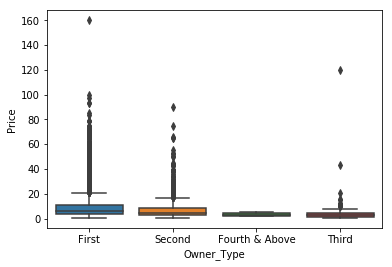

In [30]:
sns.boxplot(x="Owner_Type", y="Price", data=df)

From the boxplot we can see that price value is decreasing as the Owner_Type increases. So we are going<br> to replace the string values corresponding integervalues

In [31]:
df['Owner_Type'] = df['Owner_Type'].replace('First','1',regex=True)
df['Owner_Type'] = df['Owner_Type'].replace('Fourth & Above','4',regex=True)
df['Owner_Type'] = df['Owner_Type'].replace('Second','2',regex=True)
df['Owner_Type'] = df['Owner_Type'].replace('Third','3',regex=True)

In [32]:
df['Owner_Type'] = pd.to_numeric(df['Owner_Type'],errors='coerce')

In [33]:
print(df.groupby('Location').size())

Location
Ahmedabad     220
Bangalore     353
Chennai       488
Coimbatore    634
Delhi         539
Hyderabad     732
Jaipur        408
Kochi         640
Kolkata       530
Mumbai        766
Pune          599
dtype: int64


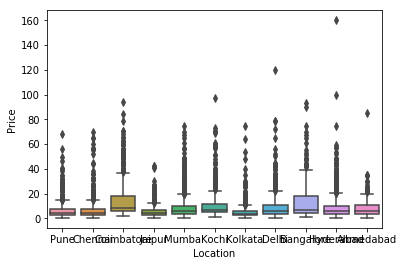

In [34]:
sns.boxplot(x="Location", y="Price", data=df)

From the boxplot we can see that Location of seller doesn't make much difference to price so <br>we can remove that field

In [35]:
df = df.drop('Location',1)

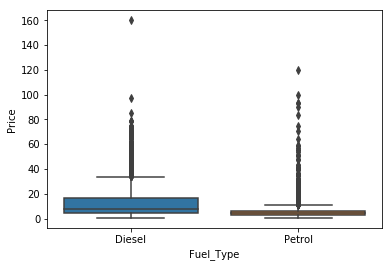

In [36]:
sns.boxplot(x="Fuel_Type", y="Price", data=df)

In [37]:
df.to_csv('cleaned data.csv')